In [1]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict 
from langgraph.graph import StateGraph,START,END 
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AIMessage
from dotenv import load_dotenv
load_dotenv()


True

In [5]:
class State(TypedDict):
    messages: str 


llm = ChatGroq(model_name="qwen-qwq-32b")

def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"]).content]}


workflow = StateGraph(State)

workflow.add_node("chatbot",chatbot)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot", END)

graph = workflow.compile()



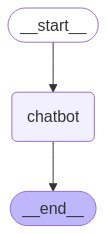

In [3]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [6]:
result = graph.invoke({"messages": "what is langchain?"})

In [7]:
print(result["messages"][0])


<think>
Okay, I need to explain what LangChain is. Let me start by recalling what I know. LangChain is a framework related to AI and large language models. It's used for developing applications with LLMs. But I should be more specific. 

First, the user is asking for a definition, so I should state what it is upfront. It's a framework, right? So maybe start with that. Then mention that it's designed to simplify the process of building applications that leverage large language models (LLMs). 

I should outline its key features. Integration with different LLMs, handling workflows, modular components, maybe tools for data processing, and examples of use cases. Wait, the user might also want to know why someone would use LangChain instead of just working directly with an LLM API. So maybe include that it abstracts away some complexity, provides best practices, and allows for more complex workflows.

Let me think about the components. There's the idea of chains, agents, memory, and tools. 

In [9]:
!pip install arxiv

  Using cached feedparser-6.0.11-py3-none-any.whl.metadata (2.4 kB)
  Using cached sgmllib3k-1.0.0-py3-none-any.whl
Using cached feedparser-6.0.11-py3-none-any.whl (81 kB)


In [ ]:
from langchain.tools import tool
from typing import List, Dict, Any, Optional
import arxiv

@tool
def search_paper(query: str, max_results: int = 5) -> List[Dict[str, Any]]:
    """
    Usefull when you need to search for papers based on a query.

    Args:
        query: The search query string.
        max_results: The maximum number of results to return. Defaults to 5.

    Returns:
        A list of dictionaries, where each dictionary contains details of a paper
        (title, authors, summary, published date, pdf_url). Returns an empty list
        if an error occurs or no papers are found.
    """
    client = arxiv.Client()
    search = arxiv.Search(
        query = query,
        max_results = max_results,
        sort_by = arxiv.SortCriterion.Relevance
    )

    results = list(client.results(search))
    return results
